<a href="https://colab.research.google.com/github/ZK2207/kmeans-clustering/blob/main/Failure_Clustering_Analysis_Tool_via_an_Unsupervised_learning_approach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Failure Clustering Analysis Tool via an Unsupervised learning approach​**

---



**Problem:**
Our analysis of regression data over the past four weeks has revealed an average of approximately 500+ unanalyzed failures. Many of these failures likely stem from common root causes, as evidenced by the significant reduction in unanalyzed failures observed after addressing specific issues in previous regression cycles.


## **Data Collection and Preprocessing**

In [22]:
# @title ####**1. Install packages**
# %%capture
!pip install numpy pandas scikit-learn matplotlib kneed
!pip install Levenshtein

In [24]:
# @title ####**2. Read data from CSV file**
### Read data from CSV file from your drive ###
# from google.colab import drive
# drive.mount('/content/drive')
# import pandas as pd
# # Read data from CSV file from
# filename = '/content/drive/MyDrive/Final.csv'


# Upload file OriginalData.csv to Colab and read data from CSV file from this session
import pandas as pd
filename = '/content/OriginalData.csv'
data = pd.read_csv(filename)
data.head(10)

,Main Category,Test Plan Name,TC Name,Test Level,Mode,Comments,Ground truth
0,General_Management,SNMP,TC_DATA_SET_353,Regression2,auto,Unanalyzed - MEP status is not Yes,Group04
1,Interfaces,Port,TC_DATA_SET_423,Regression1,auto,Unanalyzed - Configuration of invalid interfac...,Group03
2,General_Management,Alarm,TC_DATA_SET_154,Regression2,auto,Unanalyzed - Two-Way Frame Delay min value is ...,Group07
3,Interfaces,NFV,TC_DATA_SET_437,Regression2,auto,The samples in CSV file is incorrect. Actual 298,Group06
4,General_Management,SNMP,TC_DATA_SET_95,Regression1,auto,Unanalyzed - MEP status is No\r\n,Group04
5,General_Management,SNMP,TC_DATA_SET_343,Regression1,auto,Unanalyzed - Two-Way Frame Delay min value is ...,Group07
6,Acceptance,Acceptance,TC_DATA_SET_251,Regression3,auto,Unanalyzed - Could not set ip on vlan,Group05
7,General_Management,SNMP,TC_DATA_SET_456,Regression2,auto,Unanalyzed - Two-Way Frame Delay min value = 0,Group07
8,General_Management,Alarm,TC_DATA_SET_156,Regression2,auto,Unanalyzed - Two-Way Frame Delay min value sho...,Group07
9,General_Management,SNMP,TC_DATA_SET_385,Regression3,auto,Unanalyzed - Two-Way Frame Delay min value is ...,Group07


In [25]:
# @title ####**3. Preprocessing data using Natural Language Toolkit (NLTK)**
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download stopwords from nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Data preprocessing function
def preprocess_text(text, words_to_remove):
    """
    Preprocesses the input text by removing specified words, special characters, stopwords, and performing lemmatization.

    Parameters:
    text (str): The input text to be preprocessed.
    words_to_remove (list of str): A list of words to be removed from the text.

    Returns:
    str: The preprocessed text.
    """
    for word in words_to_remove:
        text = text.replace(word, '')  # Remove unexpected words
    text = re.sub(r'[^\w\s]', '', text)  # Remove special characters, keep only words and punctuation
    stop_words = set(stopwords.words('english'))  # Remove stopwords
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word not in stop_words]
    # Perform lemmatization
    lemmatizer = WordNetLemmatizer()
    lemmatized_text = [lemmatizer.lemmatize(word) for word in filtered_text]
    return " ".join(lemmatized_text)

# Apply data preprocessing to the 'Comments' column
words_to_remove = ['Unanalyzed']
data['Pre_Comments'] = data['Comments'].apply(lambda x: preprocess_text(x, words_to_remove))

# Display the preprocessed dataset
display(pd.DataFrame(data))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Main Category,Test Plan Name,TC Name,Test Level,Mode,Comments,Ground truth,Pre_Comments
0,General_Management,SNMP,TC_DATA_SET_353,Regression2,auto,Unanalyzed - MEP status is not Yes,Group04,MEP status Yes
1,Interfaces,Port,TC_DATA_SET_423,Regression1,auto,Unanalyzed - Configuration of invalid interfac...,Group03,Configuration invalid interface reporting failed
2,General_Management,Alarm,TC_DATA_SET_154,Regression2,auto,Unanalyzed - Two-Way Frame Delay min value is ...,Group07,TwoWay Frame Delay min value zero
3,Interfaces,NFV,TC_DATA_SET_437,Regression2,auto,The samples in CSV file is incorrect. Actual 298,Group06,The sample CSV file incorrect Actual 298
4,General_Management,SNMP,TC_DATA_SET_95,Regression1,auto,Unanalyzed - MEP status is No\r\n,Group04,MEP status No
...,...,...,...,...,...,...,...,...
498,General_Management,SNMP,TC_DATA_SET_265,Regression3,auto,Unanalyzed - Two-Way Frame Delay min value = 0,Group07,TwoWay Frame Delay min value 0
499,General_Management,Alarm,TC_DATA_SET_172,Regression2,auto,Offload flag is enabled,Group01,Offload flag enabled
500,Interfaces,Port,TC_DATA_SET_190,Regression2,auto,The samples in CSV file is incorrect. Actual 298,Group06,The sample CSV file incorrect Actual 298
501,General_Management,SNMP,TC_DATA_SET_460,Regression2,auto,Unanalyzed - Two-Way Frame Delay min value is ...,Group07,TwoWay Frame Delay min value still 0


## **Determine Maximum Number of Clusters using Levenshtein Distance**

<ipython-input-26-4d550430c603>:39: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  dend = dendrogram(linkage(distance_matrix, method='complete'), labels=np.arange(1, num_comments + 1))


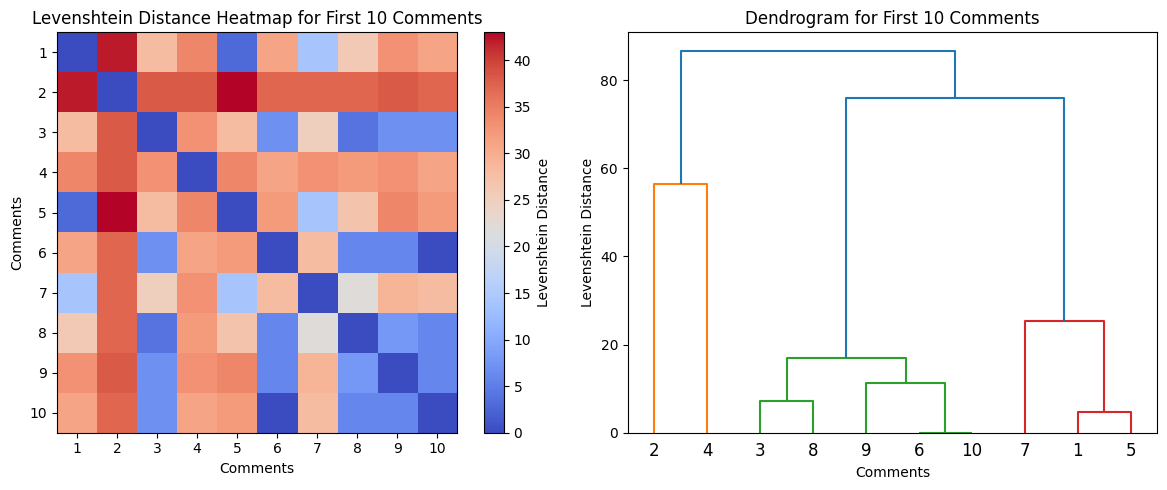

In [26]:
# @title ####**1. Average Levenshtein Distance and Heatmap for First 10 data index**
import numpy as np
import matplotlib.pyplot as plt
from Levenshtein import distance
from scipy.cluster.hierarchy import dendrogram, linkage

def calculate_distance_matrix(data):
    distance_matrix = [[distance(word1, word2) for word2 in data] for word1 in data]
    return distance_matrix


# Select the first 10 comments
selected_comments = data['Pre_Comments'][:10]

# Calculate Levenshtein distance matrix for selected comments
num_comments = len(selected_comments)
distance_matrix = np.zeros((num_comments, num_comments))
for i in range(num_comments):
    for j in range(i, num_comments):
        dist = distance(selected_comments[i], selected_comments[j])
        distance_matrix[i, j] = dist
        distance_matrix[j, i] = dist  # Symmetric matrix

# Create dendrogram
plt.figure(figsize=(12, 5))

# Plot heatmap
plt.subplot(1, 2, 1)
plt.imshow(distance_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Levenshtein Distance')
plt.xticks(ticks=np.arange(len(selected_comments)), labels=np.arange(1, len(selected_comments) + 1))
plt.yticks(ticks=np.arange(len(selected_comments)), labels=np.arange(1, len(selected_comments) + 1))
plt.xlabel('Comments')
plt.ylabel('Comments')
plt.title('Levenshtein Distance Heatmap for First 10 Comments')

# Plot dendrogram
plt.subplot(1, 2, 2)
dend = dendrogram(linkage(distance_matrix, method='complete'), labels=np.arange(1, num_comments + 1))
plt.title('Dendrogram for First 10 Comments')
plt.xlabel('Comments')
plt.ylabel('Levenshtein Distance')

plt.tight_layout()
plt.show()

<ipython-input-27-630020e648e3>:22: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  dend = dendrogram(linkage(distance_matrix, method='complete'))


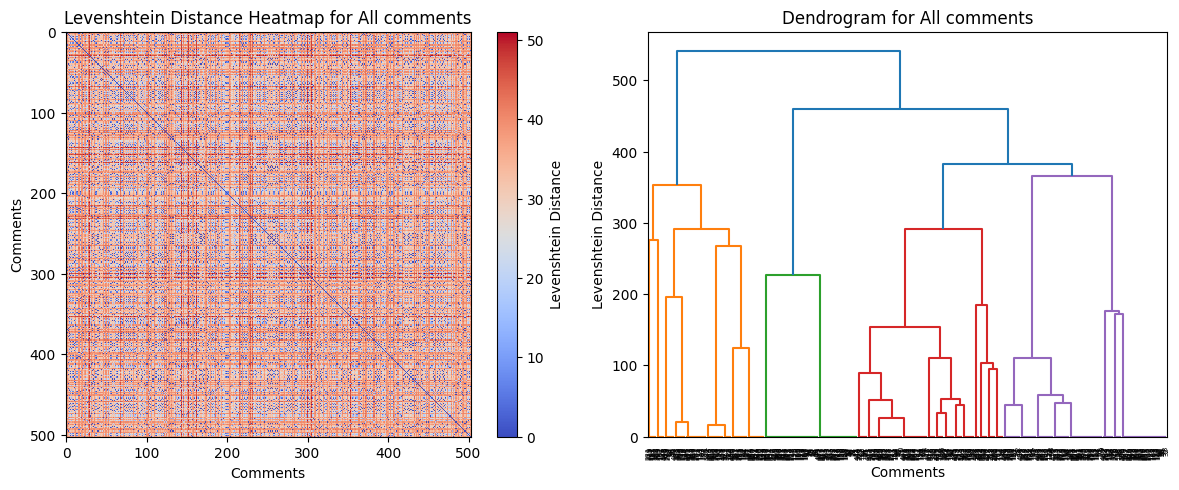

In [27]:
# @title ####**2. Levenshtein Distance Heatmap and Dendrogram for all data**
selected_comments = data['Pre_Comments']
# Calculate the Levenshtein distance matrix
distance_matrix = np.zeros((len(selected_comments), len(selected_comments)))
for i in range(len(selected_comments)):
    for j in range(len(selected_comments)):
        distance_matrix[i, j] = distance(selected_comments[i], selected_comments[j])

# Create dendrogram
plt.figure(figsize=(12, 5))

# Plot heatmap
plt.subplot(1, 2, 1)
plt.imshow(distance_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Levenshtein Distance')
plt.xlabel('Comments')
plt.ylabel('Comments')
plt.title('Levenshtein Distance Heatmap for All comments')

# Plot dendrogram
plt.subplot(1, 2, 2)
dend = dendrogram(linkage(distance_matrix, method='complete'))
plt.title('Dendrogram for All comments')
plt.xlabel('Comments')
plt.ylabel('Levenshtein Distance')

plt.tight_layout()
plt.show()

In [29]:
# @title ####**3. Classify comments using Levenshtein distance**
import pandas as pd
from collections import defaultdict
from Levenshtein import distance


def calculate_threshold(data, percentage):
    total_length = sum(len(comment) for comment in data['Pre_Comments'])
    average_length = total_length / len(data)
    return average_length * percentage / 100

# Calculate the threshold based on the percentage
threshold = calculate_threshold(data, percentage=50)

def classify_comments(data, threshold):
    clusters = defaultdict(list)
    for i, row in data.iterrows():
        pre_comment = row['Pre_Comments']
        comment = row['Comments']
        assigned = False
        for cluster in clusters:
            centroid = cluster[0]
            dist = distance(pre_comment, centroid)
            if dist <= threshold:
                clusters[cluster].append((row['TC Name'], comment, row['Ground truth']))
                assigned = True
                break
        if not assigned:
            clusters[(pre_comment,)].append((row['TC Name'], comment, row['Ground truth']))
    return clusters

# Classify comments using Levenshtein distance
classified_comments = classify_comments(data, threshold)

# Create a DataFrame to store the data
cluster_data = []
for idx, (centroid, cluster) in enumerate(classified_comments.items()):
    for member_idx, (name, member, class_name) in enumerate(cluster):
        cluster_data.append({
            'Cluster': idx + 1,
            'Centroid': centroid[0].title(),
            'Comments': member,
            'TC Name': name,
            'Ground truth': class_name
        })

# Convert the data to a pandas DataFrame
cluster_df = pd.DataFrame(cluster_data)
display(cluster_df)
# Write the DataFrame to a CSV file
cluster_df.to_csv('Classified_comments.csv', index=False)


,Cluster,Centroid,Comments,TC Name,Ground truth
0,1,Mep Status Yes,Unanalyzed - MEP status is not Yes,TC_DATA_SET_353,Group04
1,1,Mep Status Yes,Unanalyzed - MEP status is No\r\n,TC_DATA_SET_95,Group04
2,1,Mep Status Yes,Unanalyzed - Could not set ip on vlan,TC_DATA_SET_251,Group05
3,1,Mep Status Yes,Unanalyzed - MEP status is No\r\n,TC_DATA_SET_257,Group04
4,1,Mep Status Yes,Unanalyzed - MEP status is not Yes,TC_DATA_SET_450,Group04
...,...,...,...,...,...
498,15,Failed First Level Exception Need Investigation,\tFailed because of a first level exception - ...,TC_DATA_SET_237,Group02
499,15,Failed First Level Exception Need Investigation,Failed because of a first level except...,TC_DATA_SET_121,Group02
500,15,Failed First Level Exception Need Investigation,Failed because of a first level except...,TC_DATA_SET_239,Group02
501,15,Failed First Level Exception Need Investigation,Failed because of a first level except...,TC_DATA_SET_04,Group02


<Axes: xlabel='Cluster'>

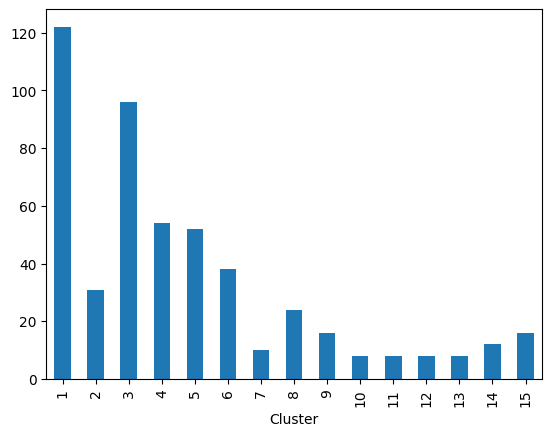

In [30]:
cluster_df.groupby(['Cluster']).size().plot.bar(stacked=True)

In [31]:
# @title ####**Maximum Number of Clusters using Levenshtein Distance**
print(f'Maximum Number of Clusters using Levenshtein Distance: {len(classified_comments)}')

Maximum Number of Clusters using Levenshtein Distance: 15


## **Determine Optimal Number of Cluster Elbow method**




In [32]:
# @title ####**1. Convert data to matrix using TF-IDF**
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['Pre_Comments'])
X.shape

(503, 57)

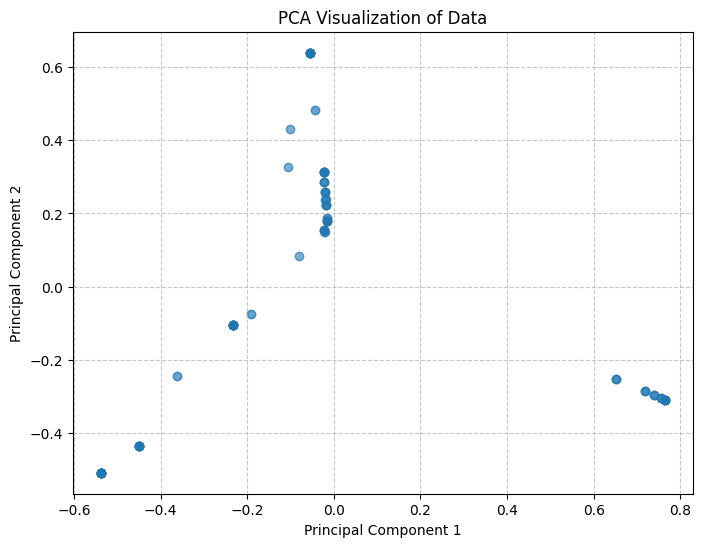

In [33]:
# @title ####**2. Draw a scatter plot after applied PCA to reduce the data dimensionality to 2 dimensions**
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.1)
plt.title('PCA Visualization of Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


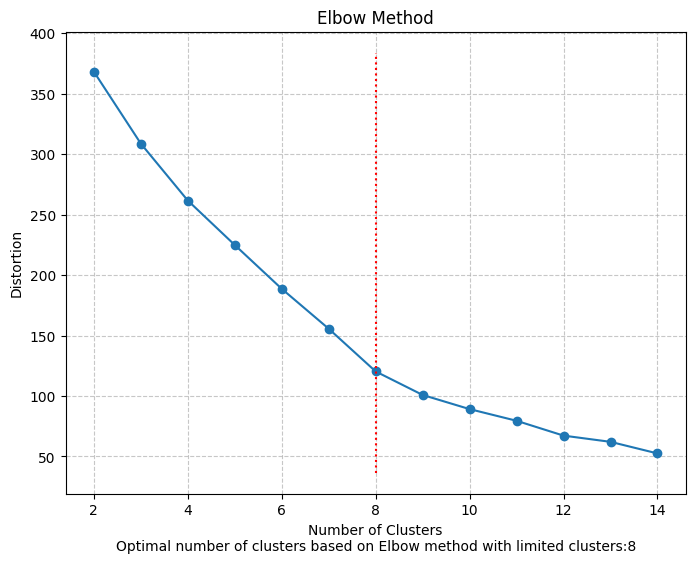

In [34]:
# @title ####**3. Optimal Number of Cluster using Elbow method**
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from kneed import KneeLocator

max_clusters = len(classified_comments)

def calculate_elbow(X, num_clusters):
    distortions = []
    for n_clusters in range(2, num_clusters):
        kmeans = KMeans(n_clusters=n_clusters, random_state=42)
        kmeans.fit(X)
        distortions.append(kmeans.inertia_)
    return distortions

distortions = calculate_elbow(X, max_clusters)
kl_elbow = KneeLocator(range(2, max_clusters), distortions, curve='convex', direction='decreasing')
optimal_num_clusters_elbow = kl_elbow.elbow

plt.figure(figsize=(8, 6))
plt.plot(range(2, max_clusters), distortions, marker='o')
plt.xlabel(f'Number of Clusters\nOptimal number of clusters based on Elbow method with limited clusters:{optimal_num_clusters_elbow}')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.vlines(optimal_num_clusters_elbow, plt.ylim()[0], plt.ylim()[1], linestyles='dotted', colors='red')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# **Apply KMeans clustering with the Optimal number of Cluster via Elbow method**




/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


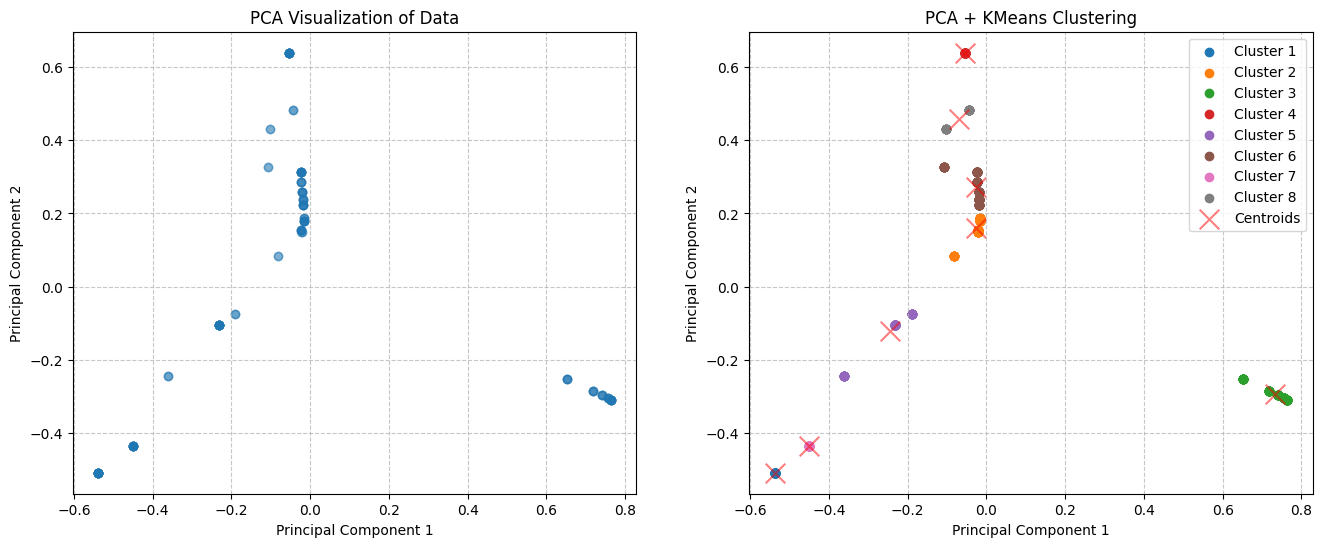

In [35]:
# @title ####**1. Draw scatter plots after applied PCA and KMeans clustering**
kmeans = KMeans(n_clusters=optimal_num_clusters_elbow, random_state=42)
kmeans.fit(X_pca)
cluster_labels = kmeans.labels_

# Vẽ biểu đồ phân tán
plt.figure(figsize=(16, 6))
plt.subplot(1,2,1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.1)
plt.title('PCA Visualization of Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True, linestyle='--', alpha=0.7)

# Plot clustered data
plt.subplot(1,2,2)
for cluster_label in range(optimal_num_clusters_elbow):  # Assuming 10 clusters
    plt.scatter(X_pca[cluster_labels == cluster_label, 0],
                X_pca[cluster_labels == cluster_label, 1],
                label=f'Cluster {cluster_label + 1}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=200, label='Centroids', alpha=0.5)
plt.title('PCA + KMeans Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()




In [36]:
# @title ####**2. Cluster data using KMeans**
import pandas as pd
from sklearn.cluster import KMeans
from collections import defaultdict
import csv

def cluster_comments(data, num_clusters):
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(X)
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_

    clusters = defaultdict(list)
    for i, comment in enumerate(data['Comments']):
        clusters[labels[i]].append((data.iloc[i]['TC Name'], data.iloc[i]['Ground truth'], comment))
    # Get representative comment for each cluster as centroid
    centroid_comments = []
    for cluster_idx, cluster in clusters.items():
        comments = [comment for _,_,comment in cluster]
        representative_comment = max(comments, key=len)  # Choose the longest comment as representative
        centroid_comments.append(representative_comment)

    return clusters, centroid_comments

# Define the number of clusters
num_clusters = optimal_num_clusters_elbow

# Cluster comments using KMeans
classified_comments, centroid_comments = cluster_comments(data, num_clusters)

# Create a DataFrame to store the data
cluster_data = []
for cluster_idx, (cluster_id, cluster) in enumerate(classified_comments.items()):
  centroid = centroid_comments[cluster_idx]
  for name,class_name, comment in cluster:
    cluster_data.append({
        'Centroid': centroid,
        'Member': comment,
        'TC Name': name,
        'Cluster': cluster_id + 1,
        'Ground truth': class_name
        })

# Convert the data to a pandas DataFrame
cluster_df = pd.DataFrame(cluster_data)
display(cluster_df)
# Write the DataFrame to a CSV file
cluster_df.to_csv('Classified_comments_KMEANS.csv', index=False)

,Centroid,Member,TC Name,Cluster,Ground truth
0,Unanalyzed - MEP status is not as expected,Unanalyzed - MEP status is not Yes,TC_DATA_SET_353,8,Group04
1,Unanalyzed - MEP status is not as expected,Unanalyzed - MEP status is No\r\n,TC_DATA_SET_95,8,Group04
2,Unanalyzed - MEP status is not as expected,Unanalyzed - MEP status is No\r\n,TC_DATA_SET_257,8,Group04
3,Unanalyzed - MEP status is not as expected,Unanalyzed - MEP status is not Yes,TC_DATA_SET_450,8,Group04
4,Unanalyzed - MEP status is not as expected,Unanalyzed - MEP status is not as expected,TC_DATA_SET_315,8,Group04
...,...,...,...,...,...
498,WARNING: Issue-123: Offload flag is enabled. E...,Offload flag enabled: Issue-123,TC_DATA_SET_288,7,Group01
499,WARNING: Issue-123: Offload flag is enabled. E...,Offload flag is enabled,TC_DATA_SET_409,7,Group01
500,WARNING: Issue-123: Offload flag is enabled. E...,Offload flag is enabled,TC_DATA_SET_173,7,Group01
501,WARNING: Issue-123: Offload flag is enabled. E...,WARNING: offload flag enabled: Issue-123,TC_DATA_SET_448,7,Group01
